In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# magnetizing inductance

N1 = 10
per = 1000 * 4 * 3.14 * 1e-7

l1 = 30e-3
l2 = 60e-3
h1 = 120e-3
w1 = 600e-3

Req = (5*l1+2*l2+2*h1)/(2*l1*w1)/per
Lm = N1**2/Req

# maxwell 2D와 잘 맞는 것 검증 완료

In [72]:
# leakage inductance

N1 = 10
per0 = 1 * 4 * 3.14 * 1e-7

freq = 100e+3
con = 5.96e+7
sd = (1/3.14/per0/con) # skin depth

lw = 10e-3
Hw = 80e-3

m1 = 1
m2 = 1

dd = 10e-3

delta = 10e-3/sd
phi1 = (math.sinh(2*delta) - math.sin(2*delta))/(math.cosh(2*delta) - math.cos(2*delta))
phi2 = (math.sinh(1*delta) - math.sin(1*delta))/(math.cosh(1*delta) - math.cos(1*delta))
Fw1 = 1/2/m1**2/delta * ((4*m1**2-1)*phi1-2*(m1**2-1)*phi2)
Fw2 = 1/2/m2**2/delta * ((4*m2**2-1)*phi1-2*(m2**2-1)*phi2)

Llt = N1**2 * per0 * lw/Hw * (10e-3*Fw1/3 + 10e-3*Fw2/3 + dd)
Llt*1e+6



(1 - (Matrix1.L(Tx_winding,Rx_winding) / sqrt(Matrix1.L(Tx_winding,Tx_winding)*Matrix1.L(Rx_winding,Rx_winding)))^2) * Matrix1.L(Tx_winding,Tx_winding) * 1e+6

0.00425436211660029

In [120]:
# dowell's equation

freq = 200e+3
per0 = 1 * 4 * 3.14 * 1e-7
sd = (1.678/3.14/freq/0.999991/per0)**0.5*1e-3 # skin_depth

d = 10e-3
dw = (3.14/4)**0.5*d

h = 80e-3
hw = dw*4
epw = hw/h
#epw = 1

m = 2

delta = d/sd/(epw**0.5)

Fr = delta * ((math.sinh(2*delta)+math.sin(2*delta))/(math.cosh(2*delta)-math.cos(2*delta)) + (2/3)*(m**2-1)*(math.sinh(2*delta)-math.sin(2*delta))/(math.cosh(2*delta)+math.cos(2*delta)))

Fr

30.902637472575947

In [41]:
# dowell function

def dowell(low,high,interval,N1,m,h): # Comparison BetweenNumericalandAnalyticalMethodsofACResistanceEvaluationforMediumFrequencyTransformers:ValidationonaPrototype

    freq = np.arange(low,high,interval)

    per0 = 1 * 4 * 3.14 * 1e-7
    sd = (1.678/3.14/freq/0.999991/per0)**0.5*1e-3 # skin_depth

    d = 10e-3
    dw = (3.14/4)**0.5*d

    hw = dw*N1
    epw = hw/h
    #epw = 1

    delta = d/sd*(epw**0.5)
    #delta = d/sd

    sinh = np.vectorize(math.sinh)
    sin = np.vectorize(math.sin)
    cosh = np.vectorize(math.cosh)
    cos = np.vectorize(math.cos)

    G1 = (sinh(2*delta)+sin(2*delta))/(cosh(2*delta)-cos(2*delta))
    G2 = (sinh(2*delta)-sin(2*delta))/(cosh(2*delta)+cos(2*delta))
    G3 = (sinh(delta)*cos(delta)+cosh(delta)*sin(delta))/(cosh(2*delta)-cos(2*delta))

    Fr = delta * (G1 + (2/3)*(m**2-1)*G2)
    #Fr = delta/2 * (G1 + (1/3)*(m**2-1)*G2)

    print(epw)

    return Fr


def dowell2(low,high,interval,N1,m,h): # book

    freq = np.arange(low,high,interval)

    per0 = 1 * 4 * 3.14 * 1e-7
    sd = (1.678/3.14/freq/0.999991/per0)**0.5*1e-3 # skin_depth

    d = 10e-3
    N = 4

    por = (3.14/N1)**0.5 * d * N/h
    phi = (por*3.14/4)**0.5*d/sd
    phi[phi<1] = 1

    sinh = np.vectorize(math.sinh)
    sin = np.vectorize(math.sin)
    cosh = np.vectorize(math.cosh)
    cos = np.vectorize(math.cos)

    G1 = (sinh(2*phi)+sin(2*phi))/(cosh(2*phi)-cos(2*phi))
    G2 = (sinh(phi)*cos(phi)+cosh(phi)*sin(phi))/(cosh(2*phi)-cos(2*phi))
    Fr = phi*(G1+2/3*(m**2-1)*(G1-2*G2))

    return Fr


def dowell3(low,high,interval,N1,m,h): # Simple analytical approach for the calculation of winding resistance in gapped magnetic components

    freq = np.arange(low,high,interval)

    per0 = 1 * 4 * 3.14 * 1e-7

    d = 10e-3 
    deq = (3.14/4)**0.5*d

    con = 1/1.678e-8
    eff = N1*deq/h

    sd = (1/3.14/per0/con/freq)**0.5
    sd_ = sd/eff**0.5
    

    sinh = np.vectorize(math.sinh)
    sin = np.vectorize(math.sin)
    cosh = np.vectorize(math.cosh)
    cos = np.vectorize(math.cos)

    delta = deq / sd_
    
    # deq/sd_ X
    # deq/sd
    # d/sd
    # d/sd_

    G1 = (sinh(2*delta)+sin(2*delta))/(cosh(2*delta)-cos(2*delta))
    G2 = (sinh(delta)*cos(delta)+cosh(delta)*sin(delta))/(cosh(2*delta)-cos(2*delta))
    G3 = (sinh(delta)+cos(delta))/(cosh(delta)-cos(delta))
    G4 = (sinh(delta)-cos(delta))/(cosh(delta)+cos(delta))

    Fr = delta*(G1+2/3*(m**2-1)*(G1-2*G2))
    Fr = delta/2 * (G3 + (m**2-1)/3*G4)

    print(eff)


    return Fr

def dowell4(low,high,interval,N1,m,h):

    freq = np.arange(low,high,interval)
    con = 1/1.678e-8

    per0 = 1 * 4 * 3.14 * 1e-7

    d = 10e-3 
    deq = (3.14/4)**0.5*d

    eff = deq*N1/h
    sd = (1/3.14/per0/con/freq)**0.5

    sinh = np.vectorize(math.sinh)
    sin = np.vectorize(math.sin)
    cosh = np.vectorize(math.cosh)
    cos = np.vectorize(math.cos)

    delta = deq/sd
    delta_ = delta*eff**0.5

    G1 = (sinh(2*delta_)+sin(2*delta_))/(cosh(2*delta_)-cos(2*delta_))
    G2 = (sinh(delta_)-sin(delta_))/(cosh(delta_)+cos(delta_))

    Fr = delta_ * (G1 + (eff**2)*2/3*(m**2-1)*G2)

    return Fr



In [33]:
dowell4(100,1e+6,1,4,2,45e-3)

array([6.52283412e-03, 6.49046254e-03, 6.45856818e-03, ...,
       6.52284391e-05, 6.52284065e-05, 6.52283739e-05])

0.7875575620741934


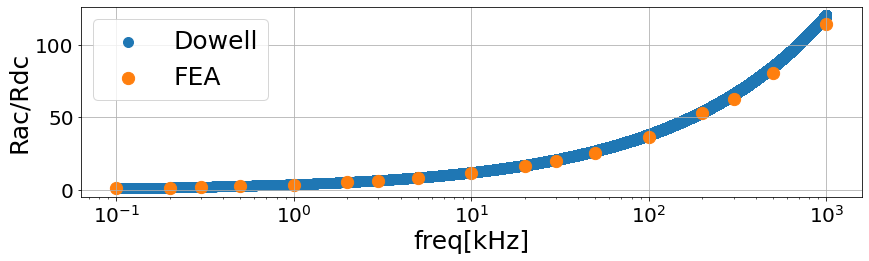

In [76]:
# dowell's equation (m=2 case) (epw = 0.787)

sim_DC = 9.01

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([10.35,13.5,17.03,22.99,32.89,46.43,56.79,73.20,103.36,146.07,178.89,231.08,328.06,480.31,564.69,729,1031])/sim_DC # 605.63

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,2,45e-3), s=100, label="Dowell")
plt.scatter(freq,sim, s=150, label="FEA")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("Rac/Rdc", fontsize=25)
plt.grid(True)

plt.semilogx()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()

0.44300112866673375


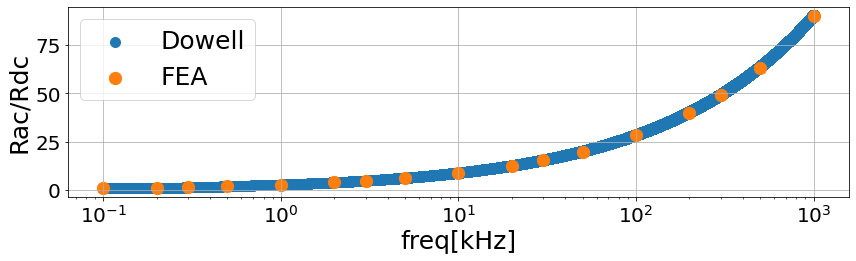

In [77]:
# dowell's equation (m=2 case) (epw = 0.5)

sim_DC = 9.01

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([9.768,11.65,13.93,18.16,25.83,36.4,44.46,57.25,80.8,114.42,140.58,180,255,361,442,571,810])/sim_DC

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,2,80e-3), s=100, label="Dowell")
plt.scatter(freq,sim, s=150, label="FEA")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("Rac/Rdc", fontsize=25)
plt.grid(True)

plt.semilogx()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()

0.23626726862225803


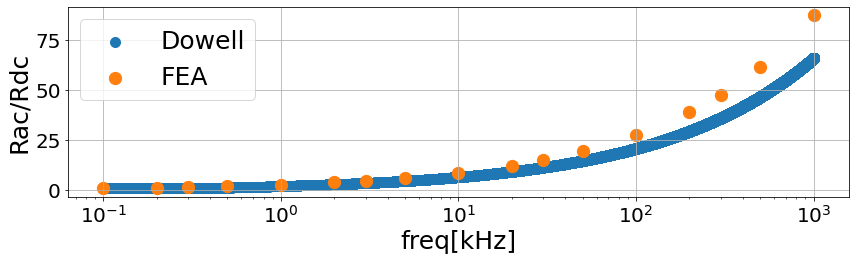

In [78]:
# dowell's equation (m=2 case) (epw = 0.787)

sim_DC = 9.01

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([9.72,11.48,13.64,17.68,25.11,35.39,43.22,55.64,78.54,111.05,136.12,175,248,351,430,556,789])/sim_DC

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,2,150e-3), s=100, label="Dowell")
plt.scatter(freq,sim, s=150, label="FEA")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("Rac/Rdc", fontsize=25)
plt.grid(True)

plt.semilogx()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()


0.23626726862225803


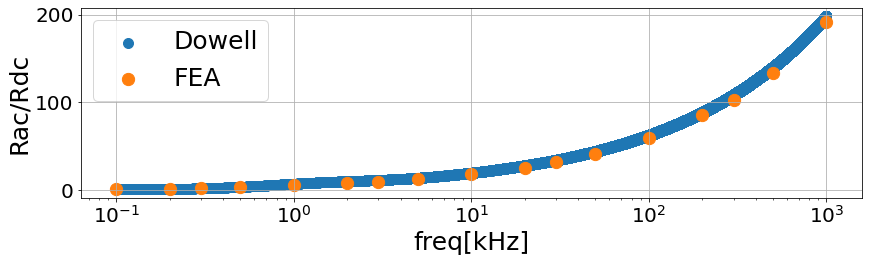

In [81]:
# dowell's equation (m=4 case) (epw = 0.787)

sim_DC = 18.02

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([22,32.5,45,66,99,140,173,226,324,464,572,745,1068,1550,1851,2404,3444])/sim_DC

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,4,150e-3), s=100, label="Dowell")
plt.scatter(freq,sim, s=150, label="FEA")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("Rac/Rdc", fontsize=25)
plt.grid(True)

plt.semilogx()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()

0.23626726862225803


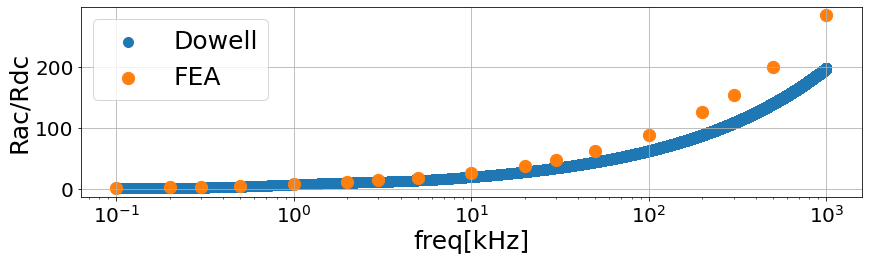

In [82]:
# dowell's equation (m=4 case) (epw = 0.787) (low l2 case)

sim_DC = 18.02

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([25,42,61,94,142,203,252,331,479,689,852,1110,1587,2262,2781,3606,5137])/sim_DC

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,4,150e-3), s=100, label="Dowell")
plt.scatter(freq,sim, s=150, label="FEA")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("Rac/Rdc", fontsize=25)
plt.grid(True)

plt.semilogx()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()

0.23626726862225803


[]

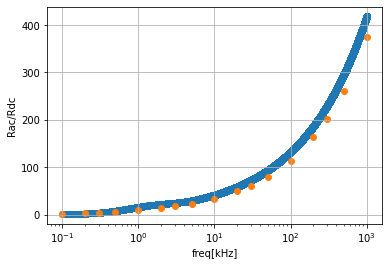

In [46]:
# dowell's equation (N=4,m=6 case) (epw = 0.787) (low l2 case)

sim_DC = 27.03

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([39,68,103,165,260,376,471,625,912,1323,1640,2146,3079,4404,5426,7055,10112])/sim_DC

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,6,150e-3))
plt.scatter(freq,sim)
plt.xlabel("freq[kHz]")
plt.ylabel("Rac/Rdc")
plt.grid(True)

plt.semilogx()

0.35440090293338705


[]

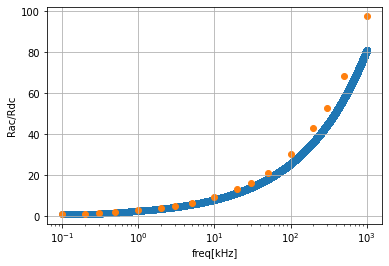

In [20]:
# dowell's equation (N=6,m=2 case) (epw = 0.787)

sim_DC = 13.516

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([14.5,17,20,26.5,38,55,68,88,126,180,221,287,408,579,711,922,1315])/sim_DC

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,6,2,150e-3))
plt.scatter(freq,sim)
plt.xlabel("freq[kHz]")
plt.ylabel("Rac/Rdc")
plt.grid(True)

plt.semilogx()

0.35440090293338705


[]

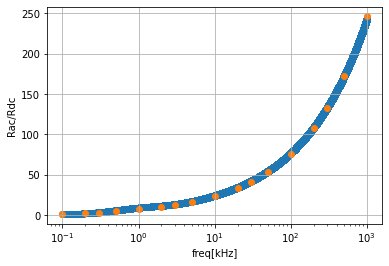

In [21]:
# dowell's equation (N=6,m=4 case) (epw = 0.787)

sim_DC = 27.03

freq = np.array([100,200,300,500,1e+3,2e+3,3e+3,5e+3,10e+3,20e+3,30e+3,50e+3,100e+3,200e+3,300e+3,500e+3,1e+6])/1e+3
sim = np.array([36,58,83.5,127,191,270,333,436,623,896,1105,1437,2049,2917,3586,4652,6654])/sim_DC

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,6,4,150e-3))
plt.scatter(freq,sim)
plt.xlabel("freq[kHz]")
plt.ylabel("Rac/Rdc")
plt.grid(True)

plt.semilogx()

0.7594305062858293


[]

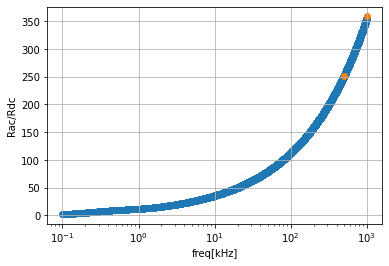

In [ ]:
# dowell's equation (N=6,m=4 case) (epw = 0.787)

sim_DC = 27.03

freq = np.array([500e+3,1e+6])/1e+3
sim = np.array([6810,9690])/sim_DC

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,6,4,70e-3))
plt.scatter(freq,sim)
plt.xlabel("freq[kHz]")
plt.ylabel("Rac/Rdc")
plt.grid(True)

plt.semilogx()

0.44300112866673375


[]

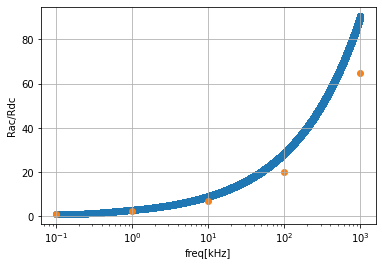

In [765]:
# dowell's equation (N=4,m=2 case) (epw = 0.787) (with 3D) (skin depth mesh)

sim_DC = 11.963

freq = np.array([100,1e+3,10e+3,100e+3,1e+6])/1e+3
sim = np.array([12.7,31.5,82,239.12,773])/sim_DC

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,2,80e-3))
plt.scatter(freq,sim)
plt.xlabel("freq[kHz]")
plt.ylabel("Rac/Rdc")
plt.grid(True)

plt.semilogx()

0.23626726862225803


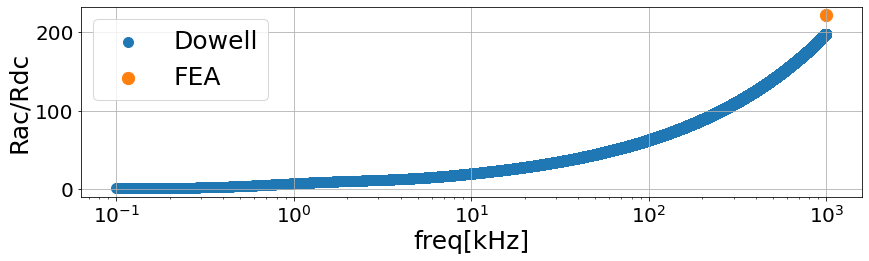

In [83]:
# dowell's equation skewcase (m=4 case) (epw = 0.787)

sim_DC = 18.02

freq = np.array([1e+6])/1e+3
sim = np.array([3989])/sim_DC

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(np.arange(100,1e+6,1)/1e+3,dowell3(100,1e+6,1,4,4,150e-3), s=100, label="Dowell")
plt.scatter(freq,sim, s=150, label="FEA")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("Rac/Rdc", fontsize=25)
plt.grid(True)

plt.semilogx()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()

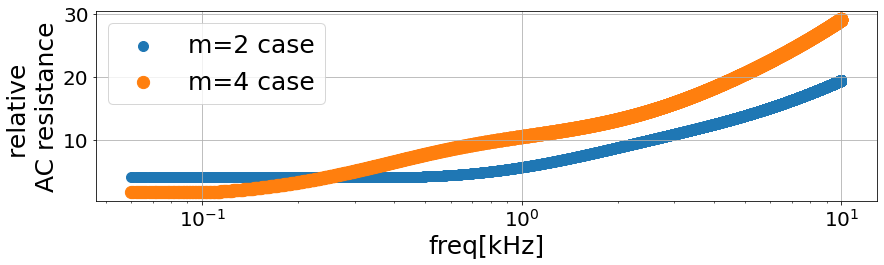

array([1.        , 1.        , 1.        , ..., 4.8510081 , 4.85125072,
       4.85149333])

In [113]:
freq = np.arange(60,10e+3,1)

per0 = 1 * 4 * 3.14 * 1e-7

m1 = 2
m2 = 4

d1 = 6e-3
d2 = 12e-3
deq1 = (3.14/4)**0.5*d1
deq2 = (3.14/4)**0.5*d2

h = 150e-3

con = 1/1.678e-8
eff1 = 10*deq1/h
eff2 = 5*deq2/h

sd = (1/3.14/per0/con/freq)**0.5
sd1 = sd/eff1**0.5
sd2 = sd/eff2**0.5

sinh = np.vectorize(math.sinh)
sin = np.vectorize(math.sin)
cosh = np.vectorize(math.cosh)
cos = np.vectorize(math.cos)

delta1 = deq1 / sd1
delta2 = deq2 / sd2
delta1[delta1<1] = 1
delta2[delta2<1] = 1

# deq/sd_ X
# deq/sd
# d/sd
# d/sd_

G11 = (sinh(delta1)+cos(delta1))/(cosh(delta1)-cos(delta1))
G12 = (sinh(delta1)-cos(delta1))/(cosh(delta1)+cos(delta1))
G21 = (sinh(delta2)+cos(delta2))/(cosh(delta2)-cos(delta2))
G22 = (sinh(delta2)-cos(delta2))/(cosh(delta2)+cos(delta2))

Fr1 = delta1/2 * (G11 + (m1**2-1)/3*G12) * 4
Fr2 = delta2/2 * (G21 + (m2**2-1)/3*G22)

plt.rc('font', size=25)  
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["figure.figsize"] = (14,3.5)

plt.scatter(freq*1e-3,Fr1, s=100, label="m=2 case")
plt.scatter(freq*1e-3,Fr2, s=150, label="m=4 case")
plt.xlabel("freq[kHz]", fontsize=25)
plt.ylabel("relative \nAC resistance", fontsize=25)
plt.grid(True)

plt.semilogx()
#plt.semilogy()

plt.legend()
plt.legend(loc='upper left', fontsize=25)
plt.show()

delta1